<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Homework-Cannonball-Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trajectory with air resistance

\Many elementary mechanics problems deal with the physics of objects
moving or flying through the air, but they almost always ignore friction
and air resistance to make the equations solvable.  If we're using a
computer, however, we don't need solvable equations.

Consider, for instance, a spherical cannonball shot from a cannon standing
on level ground.  The air resistance on a moving sphere is a force in the
opposite direction to the motion with magnitude

$F = \frac{1}{2} \pi R^2\rho C v^2$

where $R$ is the sphere's radius, $\rho$ is the density of air, $v$ is the
velocity, and $C$ is the so-called *coefficient of drag* (a
property of the shape of the moving object, in this case a sphere). Starting from Newton's second law, $F=ma$, it can be shown that the
  equations of motion for the position $(x,y)$ of the cannonball are

$
\ddot{x} = - {\pi R^2\rho C\over2m}\,
             \dot{x}\sqrt{\dot{x}^2+\dot{y}^2},
\qquad
\ddot{y} =  - g - {\pi R^2\rho C\over2m}\,
             \dot{y}\sqrt{\dot{x}^2+\dot{y}^2},
$

where $m$ is the mass of the cannonball, $g$ is the acceleration due to
gravity, and $\dot{x}$ and $\ddot{x}$ are the first and second derivatives
of $x$ with respect to time.

##A.
 Change these two second-order equations into four first-order
  equations using the methods you have learned, then write a program that
  solves the equations for a cannonball of mass $1\,$kg and radius $8\,$cm,
  shot at $30^\circ$ to the horizontal with initial velocity
  $100\,\mathrm{ms}^{-1}$.  The density of air is
  $\rho=1.22\,\textrm{kg}\,\textrm{m}^{-3}$ and the coefficient of drag for
  a sphere is $C=0.47$.  Make a plot of the trajectory of the cannonball
  (i.e., a graph of $y$ as a function of $x$).  Although you don't know the time it will take for the cannonball to hit the ground, you can get a pretty good estimate with some guess and check, or you may want to modify our program from class to only run for as along as the y-coordinate has a positive value.  You should get a horizontal distance between 200 and 300 meters.

Substituting $\dot{x}=v_x$ and $\dot{y}=v_y$, our equations will become:

$
\dot{x}=v_x
\qquad
\dot{y}=v_y
\qquad
\dot{v_x} = - {\pi R^2\rho C\over2m}\,
             v_x\sqrt{v_x^2+v_y^2},
\qquad
\dot{v_y} =  - g - {\pi R^2\rho C\over2m}\,
             v_y\sqrt{v_x^2+v_y^2},
$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Set your user defined variables for the initial conditions as well as the start and end time and the timestep. 


In [ ]:
start =  0.0
end   =  6.6 #maximum time to run for
theta = 30.0 #angle shot to horizontal, degrees
speed = 100.0 # initial speed, m/s
r_0   =  np.array([0.0,0.0,speed*np.cos(theta*np.pi/180),speed*np.sin(theta*np.pi/180)]) #m, m/s
R     = 0.08 #radius, m
m     = 1.0 #mass, kg
rho   = 1.22 #air density, kg*m^-3
C     = 0.47 #drag goefficient
g     = 9.81 #gravitational acceleration, m/s^2
h     = 0.001 #timestep

Define our function f(r,t).  Note the need to return four values.

In [ ]:
def f(r,t):
  x = r[0]
  y = r[1]
  vx = r[2]
  vy = r[3]
  fx = vx
  fy = vy
  fxv = -1.0* np.pi * R**2 * rho * C / (2 * m) * vx * np.sqrt(vx**2 + vy **2)
  fyv = -1.0*g-np.pi * R**2*rho*C/(2*m)*vy * np.sqrt(vx**2+vy**2)
  return np.array([fx,fy,fxv,fyv])

Main loop of our code.  Setup our arrays for position and time, loop over each timestep to perform the 4th order RK algorithm.  Note the need for an Nx4 array to solve for each of the four variables.

I'm also changing the for loop to be a while loop so that it runs as long as the cannonball is above ground (that is, y>0).

In [ ]:
N = int((end-start)/h) +1 #determine how many points I need. I'm adding 1 to make sure I get both the start and end times
rpoints = np.zeros((N,4)) #define an array for my r values.  Initially set everything to 0.  Column 0 is x position, column 1 is y position, column 2 is x velocity, column 3 is y velocity
tpoints = np.zeros(N) #define an array for my time values.  Initially set everything to 0.
rpoints[0] = r_0 #set our initial condition 
tpoints[0] = start #set our initial condition 
for n in range(N-1):
  tpoints[n+1] = h * (n+1)
  r = rpoints[n]
  t = tpoints[n]
  k_1 = h*f(r,t)
  k_2 = h*f(r+ 0.5 *k_1, t+0.5*h)
  k_3 = h*f(r+ 0.5 *k_2, t+0.5*h)
  k_4 = h*f(r+ k_3, t+h)
  rpoints[n+1] = r + (k_1+2*k_2+2*k_3+k_4)/6

Plot the results

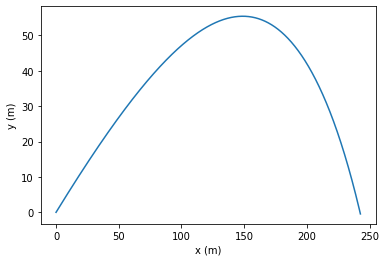

In [ ]:
plt.plot(rpoints[:,0],rpoints[:,1])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

## B. 

When one ignores air resistance, the distance traveled by a
  projectile does not depend on the mass of the projectile.  In real life,
  however, mass certainly does make a difference.  Experiment with the program   above to determine
  whether the cannonball travels further if it is heavier or lighter.  You
  could, for instance, plot a series of trajectories for cannonballs of
  different masses, or you could make a graph of distance traveled as a
  function of mass.  Describe briefly what you discover.

Here, I'll make mass a variable and make multiple plots for different mass values.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Set your user defined variables for the initial conditions as well as the start and end time and the timestep. 


In [ ]:
start =  0.0
end   =  6.6
theta = 30.0 #angle shot to horizontal, degrees
speed = 100.0 # initial speed, m/s
r_0   =  np.array([0.0,0.0,speed*np.cos(theta*np.pi/180),speed*np.sin(theta*np.pi/180)]) #m, m/s
R     = 0.08 #radius, m
rho   = 1.22 #air density, kg*m^-3
C     = 0.47 #drag goefficient
g     = 9.81 #gravitational acceleration, m/s^2
h     = 0.001 #timestep
masses = ([0.01,0.1,1.0,10.0,100.0]) #masses in kg

Define our function f(r,t).  Note the need to return four values.

In [ ]:
def f(r,t):
  x = r[0]
  y = r[1]
  vx = r[2]
  vy = r[3]
  fx = vx
  fy = vy
  fxv = -1.0* np.pi * R**2 * rho * C / (2 * m) * vx * np.sqrt(vx**2 + vy **2)
  fyv = -1.0*g-np.pi * R**2*rho*C/(2*m)*vy * np.sqrt(vx**2+vy**2)
  return np.array([fx,fy,fxv,fyv])

Main loop of our code.  Setup our arrays for position and time, loop over each timestep to perform the 4th order RK algorithm.  Note the need for an Nx4 array to solve for each of the four variables.

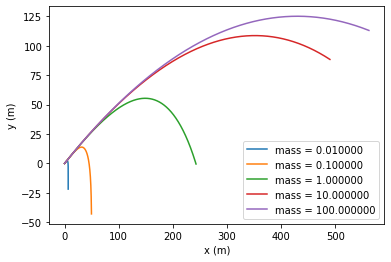

In [ ]:
N = int((end-start)/h) +1 #determine how many points I need. I'm adding 1 to make sure I get both the start and end times
for m in masses:
  rpoints = np.zeros((N,4)) #define an array for my r values.  Initially set everything to 0.  Column 0 is x position, column 1 is y position, column 2 is x velocity, column 3 is y velocity
  tpoints = np.zeros(N) #define an array for my time values.  Initially set everything to 0.
  rpoints[0] = r_0 #set our initial condition 
  tpoints[0] = start #set our initial condition 
  for n in range(N-1):
    tpoints[n+1] = h * (n+1)
    r = rpoints[n]
    t = tpoints[n]
    k_1 = h*f(r,t)
    k_2 = h*f(r+ 0.5 *k_1, t+0.5*h)
    k_3 = h*f(r+ 0.5 *k_2, t+0.5*h)
    k_4 = h*f(r+ k_3, t+h)
    rpoints[n+1] = r + (k_1+2*k_2+2*k_3+k_4)/6
  plt.plot(rpoints[:,0],rpoints[:,1],label="mass = %f"%m)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.show()

We get that the cannonball goes further if it's heavier. This is because the drag force is independent of the cannonball's mass, so the heavier cannonballs with more momentum will have less change to their x-velocity and travel further.

# Grading (50 points)

* 10 points: part a.  Is your code well written?  Is it easy to read with comments and units?
* 10 points: part a.  Did you properly conver the two, second order ODEs into four first order ODEs?
* 10 points: part a.  Did you modify the f function to return four values? And did you modify the rpoints array to be of size Nx4?
* 5 points: part a.  Did you get the correct distance?
* 5 points: part b.  Did you calculate the distance as a function of mass in some way? It can either be running your program with multiple masses and plotting the results, or plotting the distance travelled as a function of mass.  Either way your results should show the correct qualitative result.
* 5 points: part b.  Did you provide some sort of explanation for your results in part b?
* 5 points: parts a and b: Do your plots have proper labels, units, and legends (if needed)?
